In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import kaleido

df = pd.read_csv('../data/processed/dados_tratados.csv', sep=',')

In [2]:
# Convertendo colunas de datas
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'])
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])
#criando coluna ANO
df['ANO'] = df['DATA INICIAL'].dt.year

In [3]:
#criando df de cada combustível

df_gasolina_comum = df[df['PRODUTO'] == 'GASOLINA COMUM'] 

df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']

df_diesel = df[df['PRODUTO'].isin(['OLEO DIESEL', 'OLEO DIESEL S10'])]

### Evolução do preço da Gasolina Comum ao longo dos anos (Preço Médio, Mínimo e Máximo)

In [4]:
# Diferença entre preço médio, máximo e mínimo ao longo dos anos com diferenças absolutas e relativas
resultados_gasolina = []

for periodo, grupo in df_gasolina_comum.groupby('ANO'):
    #Dados de preço médio máximo
    max_media = grupo['PREÇO MÉDIO REVENDA'].max()
    estado_max = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == max_media, 'ESTADO'].values[0]

    #Dados de preço médio mínimo
    min_media = grupo['PREÇO MÉDIO REVENDA'].min()
    estado_min = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == min_media, 'ESTADO'].values[0]

    # Preço médio de revenda
    media_nacional = grupo['PREÇO MÉDIO REVENDA'].mean()
    
    # Calcular diferenças
    diff_abs = max_media - min_media
    diff_percent = round((diff_abs / min_media) * 100, 2)


    # adicionando a lista resultados
    resultados_gasolina.append({
        'ANO': periodo,
        'Preço Médio Nacional (R$)': round(media_nacional, 2),
        'Preço Médio Máximo (R$)': round(max_media, 2),
        'Estado Preço Médio Máximo': estado_max,
        'Preço Médio Mínimo': round(min_media, 2),
        'Estado Preço Médio Mínimo': estado_min,
        'Diferença Absoluta (R$)': round(diff_abs, 2),
        'Diferença Percentual (%)': round(diff_percent, 2)
    })

# Criar tabela final a partir da lista
tabela_diferencas_gasolina = pd.DataFrame(resultados_gasolina)

tabela_diferencas_gasolina

,ANO,Preço Médio Nacional (R$),Preço Médio Máximo (R$),Estado Preço Médio Máximo,Preço Médio Mínimo,Estado Preço Médio Mínimo,Diferença Absoluta (R$),Diferença Percentual (%)
0,2004,2.24,2.71,MATO GROSSO,1.89,SAO PAULO,0.82,43.38
1,2005,2.44,2.89,MATO GROSSO,2.10,PARANA,0.79,37.82
2,2006,2.65,3.03,MATO GROSSO,2.34,DISTRITO FEDERAL,0.69,29.66
3,2007,2.60,2.95,ACRE,2.21,AMAPA,0.74,33.57
4,2008,2.60,2.98,ACRE,2.30,PARANA,0.68,29.44
5,2009,2.61,2.98,ACRE,2.35,SAO PAULO,0.62,26.48
6,2010,2.66,3.04,ACRE,2.38,PARAIBA,0.66,27.76
7,2011,2.78,3.26,ACRE,2.44,AMAZONAS,0.82,33.59
8,2012,2.78,3.13,ACRE,2.53,PARAIBA,0.60,23.93
9,2013,2.92,3.38,ACRE,2.62,PIAUI,0.76,28.84


In [20]:
fig = go.Figure()

# Diferença Absoluta
fig.add_trace(go.Scatter(
    x=tabela_diferencas_gasolina['ANO'],
    y=tabela_diferencas_gasolina['Diferença Absoluta (R$)'],
    mode='lines+markers',
    name='Diferença Absoluta (R$)',
    line=dict(color='blue')
))

# Diferença Percentual
fig.add_trace(go.Scatter(
    x=tabela_diferencas_gasolina['ANO'],
    y=tabela_diferencas_gasolina['Diferença Percentual (%)'],
    mode='lines+markers',
    name='Diferença Percentual (%)',
    line=dict(color='green'),
    yaxis="y2"
))

# Layout com dois eixos Y
fig.update_layout(
    title="Evolução da Diferença de Preço da Gasolina no Brasil (GAP)",
    xaxis=dict(title="Ano"),
    yaxis=dict(title="Diferença Absoluta (R$)"),
    yaxis2=dict(title="Diferença Percentual (%)", overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

# Salvar como imagem
fig.write_image("../images/evolucao_gasolina.png")
fig.show()


In [21]:
# Contagem de estados que mais aparecem como máximo
max_counts = tabela_diferencas_gasolina['Estado Preço Médio Máximo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Máximo de Gasolina ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")

fig.write_image("../images/preco_max_gasolina.png")
fig.show()


In [22]:
# Contagem de estados que mais aparecem como mínimo
max_counts = tabela_diferencas_gasolina['Estado Preço Médio Mínimo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Mínimo de Gasolina ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")
fig.write_image("../images/preco_min_gasolina.png")
fig.show()

### Evolução do preço do Etanol ao longo dos anos (Preço Médio, Mínimo e Máximo)

In [8]:
# Diferença entre preço médio, máximo e mínimo ao longo dos anos com diferenças absolutas e relativas
resultados_etanol = []

for periodo, grupo in df_etanol.groupby('ANO'):
    #Dados de preço médio máximo
    max_media = grupo['PREÇO MÉDIO REVENDA'].max()
    estado_max = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == max_media, 'ESTADO'].values[0]

    #Dados de preço médio mínimo
    min_media = grupo['PREÇO MÉDIO REVENDA'].min()
    estado_min = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == min_media, 'ESTADO'].values[0]

    # Preço médio de revenda
    media_nacional = grupo['PREÇO MÉDIO REVENDA'].mean()
    
    # Calcular diferenças
    diff_abs = max_media - min_media
    diff_percent = round((diff_abs / min_media) * 100, 2)


    # adicionando a lista resultados
    resultados_etanol.append({
        'ANO': periodo,
        'Preço Médio Nacional (R$)': round(media_nacional, 2),
        'Preço Médio Máximo (R$)': round(max_media, 2),
        'Estado Preço Médio Máximo': estado_max,
        'Preço Médio Mínimo': round(min_media, 2),
        'Estado Preço Médio Mínimo': estado_min,
        'Diferença Absoluta (R$)': round(diff_abs, 2),
        'Diferença Percentual (%)': round(diff_percent, 2)
    })

# Criar tabela final a partir da lista
tabela_diferencas_etanol = pd.DataFrame(resultados_etanol)

tabela_diferencas_etanol

,ANO,Preço Médio Nacional (R$),Preço Médio Máximo (R$),Estado Preço Médio Máximo,Preço Médio Mínimo,Estado Preço Médio Mínimo,Diferença Absoluta (R$),Diferença Percentual (%)
0,2004,1.53,2.15,AMAPA,0.77,SAO PAULO,1.39,181.20
1,2005,1.70,2.28,RORAIMA,0.98,SAO PAULO,1.30,132.82
2,2006,1.97,2.66,RORAIMA,1.21,SAO PAULO,1.45,119.74
3,2007,1.75,2.28,PARA,1.06,SAO PAULO,1.22,114.77
4,2008,1.77,2.37,AMAPA,1.23,SAO PAULO,1.14,93.00
5,2009,1.77,2.24,AMAPA,1.13,SAO PAULO,1.11,97.62
6,2010,1.94,2.53,ACRE,1.27,SAO PAULO,1.26,99.29
7,2011,2.20,2.87,RIO GRANDE DO SUL,1.54,MATO GROSSO,1.33,86.26
8,2012,2.23,2.57,RORAIMA,1.74,SAO PAULO,0.83,48.01
9,2013,2.31,2.77,RORAIMA,1.73,SAO PAULO,1.04,60.07


In [23]:
fig = go.Figure()

# Diferença Absoluta
fig.add_trace(go.Scatter(
    x=tabela_diferencas_etanol['ANO'],
    y=tabela_diferencas_etanol['Diferença Absoluta (R$)'],
    mode='lines+markers',
    name='Diferença Absoluta (R$)',
    line=dict(color='blue')
))

# Diferença Percentual
fig.add_trace(go.Scatter(
    x=tabela_diferencas_etanol['ANO'],
    y=tabela_diferencas_etanol['Diferença Percentual (%)'],
    mode='lines+markers',
    name='Diferença Percentual (%)',
    line=dict(color='green'),
    yaxis="y2"
))

# Layout com dois eixos Y
fig.update_layout(
    title="Evolução da Diferença de Preço do Etanol no Brasil (GAP)",
    xaxis=dict(title="Ano"),
    yaxis=dict(title="Diferença Absoluta (R$)"),
    yaxis2=dict(title="Diferença Percentual (%)", overlaying='y', side='right'),
    legend=dict(x=0.01, y=1.15),
    template="plotly_white"
)

fig.write_image("../images/evolucao_etanol.png")
fig.show()

In [24]:
# Contagem de estados que mais aparecem como máximo
max_counts = tabela_diferencas_etanol['Estado Preço Médio Máximo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Máximo de Etanol ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")

fig.write_image("../images/preco_max_etanol.png")
fig.show()


In [25]:
# Contagem de estados que mais aparecem como mínimo
max_counts = tabela_diferencas_etanol['Estado Preço Médio Mínimo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Mínimo de Etanol ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")

fig.write_image("../images/preco_min_etanol.png")
fig.show()

### Evolução do preço do Diesel ao longo dos anos (Preço Médio, Mínimo e Máximo)

In [12]:
# Diferença entre preço médio, máximo e mínimo ao longo dos anos com diferenças absolutas e relativas
resultados_diesel = []

for periodo, grupo in df_diesel.groupby('ANO'):
    #Dados de preço médio máximo
    max_media = grupo['PREÇO MÉDIO REVENDA'].max()
    estado_max = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == max_media, 'ESTADO'].values[0]

    #Dados de preço médio mínimo
    min_media = grupo['PREÇO MÉDIO REVENDA'].min()
    estado_min = grupo.loc[grupo['PREÇO MÉDIO REVENDA'] == min_media, 'ESTADO'].values[0]

    # Preço médio de revenda
    media_nacional = grupo['PREÇO MÉDIO REVENDA'].mean()
    
    # Calcular diferenças
    diff_abs = max_media - min_media
    diff_percent = round((diff_abs / min_media) * 100, 2)


    # adicionando a lista resultados
    resultados_diesel.append({
        'ANO': periodo,
        'Preço Médio (R$)': round(media_nacional, 2),
        'Preço Médio Máximo (R$)': round(max_media, 2),
        'Estado Preço Médio Máximo': estado_max,
        'Preço Médio Mínimo': round(min_media, 2),
        'Estado Preço Médio Mínimo': estado_min,
        'Diferença Absoluta (R$)': round(diff_abs, 2),
        'Diferença Percentual (%)': round(diff_percent, 2)
    })

# Criar tabela final a partir da lista
tabela_diferencas_diesel = pd.DataFrame(resultados_diesel)

tabela_diferencas_diesel

,ANO,Preço Médio (R$),Preço Médio Máximo (R$),Estado Preço Médio Máximo,Preço Médio Mínimo,Estado Preço Médio Mínimo,Diferença Absoluta (R$),Diferença Percentual (%)
0,2004,1.56,1.98,ACRE,1.31,PARAIBA,0.67,50.80
1,2005,1.79,2.30,ACRE,1.60,PARAIBA,0.70,43.53
2,2006,1.93,2.32,ACRE,1.80,RIO DE JANEIRO,0.51,28.45
3,2007,1.92,2.29,ACRE,1.81,RIO DE JANEIRO,0.48,26.62
4,2008,2.08,2.51,ACRE,1.82,PARAIBA,0.69,37.75
5,2009,2.11,2.52,ACRE,1.90,GOIAS,0.62,32.96
6,2010,2.06,2.50,ACRE,1.92,BAHIA,0.58,30.22
7,2011,2.08,2.53,ACRE,1.93,GOIAS,0.60,31.22
8,2012,2.14,2.66,ACRE,1.94,BAHIA,0.73,37.55
9,2013,2.43,3.02,ACRE,2.07,PARAIBA,0.95,45.75


In [26]:
fig = go.Figure()

# Diferença Absoluta
fig.add_trace(go.Scatter(
    x=tabela_diferencas_diesel['ANO'],
    y=tabela_diferencas_diesel['Diferença Absoluta (R$)'],
    mode='lines+markers',
    name='Diferença Absoluta (R$)',
    line=dict(color='blue')
))

# Diferença Percentual
fig.add_trace(go.Scatter(
    x=tabela_diferencas_diesel['ANO'],
    y=tabela_diferencas_diesel['Diferença Percentual (%)'],
    mode='lines+markers',
    name='Diferença Percentual (%)',
    line=dict(color='green'),
    yaxis="y2"
))

# Layout com dois eixos Y
fig.update_layout(
    title="Evolução da Diferença de Preço do Diesel no Brasil (GAP)",
    xaxis=dict(title="Ano"),
    yaxis=dict(title="Diferença Absoluta (R$)"),
    yaxis2=dict(title="Diferença Percentual (%)", overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig.write_image("../images/evolucao_diesel.png")
fig.show()

In [27]:
# Contagem de estados que mais aparecem como máximo
max_counts = tabela_diferencas_diesel['Estado Preço Médio Máximo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Máximo de Diesel ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")

fig.write_image("../images/preco_max_diesel.png")
fig.show()


In [28]:
# Contagem de estados que mais aparecem como mínimo
max_counts = tabela_diferencas_diesel['Estado Preço Médio Mínimo'].value_counts().reset_index()
max_counts.columns = ['Estado', 'Frequência']

fig = px.bar(
    max_counts,
    x='Estado',
    y='Frequência',
    title="Estados que Mais Tiveram o Preço Mínimo de Diesel ao Longo dos Anos",
    text='Frequência'
)

fig.update_layout(template="plotly_white")

fig.write_image("../images/preco_min_diesel.png")
fig.show()

### Métrica para volatilidade:
Coeficiente de Variação (CV): É o desvio padrão dividido pela média - expressa a dispersão relativa dos preços.

Fórmula: 

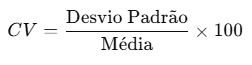

Quanto maior, mais volátil.

In [16]:
df_combustiveis = df[df['PRODUTO'].isin(['OLEO DIESEL', 'OLEO DIESEL S10', 'ETANOL HIDRATADO', 'GASOLINA COMUM'])]

# Agrupando por produto
volatilidade_produto = (
    df_combustiveis.groupby('PRODUTO')[['PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA']]
    .mean()
    .reset_index()
)

# Calculando o Coeficiente de Variação (CV)
volatilidade_produto['CV (%)'] = (
    (volatilidade_produto['DESVIO PADRÃO REVENDA'] / volatilidade_produto['PREÇO MÉDIO REVENDA']) * 100
)

# Ordenando do mais volátil para o menos
volatilidade_produto = volatilidade_produto.sort_values(by='CV (%)', ascending=False)

volatilidade_produto


,PRODUTO,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,CV (%)
0,ETANOL HIDRATADO,2.444979,0.124774,5.103256
1,GASOLINA COMUM,3.195409,0.123054,3.850957
3,OLEO DIESEL S10,3.269581,0.119029,3.640486
2,OLEO DIESEL,2.550975,0.091141,3.572796


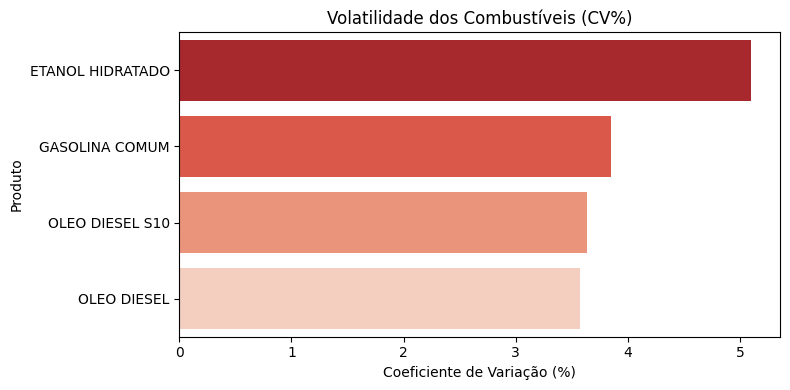

In [17]:
# GRÁFICO DA VOLATILIDADE

plt.figure(figsize=(8, 4))
sns.barplot(
    data=volatilidade_produto,
    x='CV (%)',
    y='PRODUTO',
    hue='PRODUTO',           
    palette='Reds_r',
    dodge=False,                 
    legend=False                 
)
plt.title('Volatilidade dos Combustíveis (CV%)')
plt.xlabel('Coeficiente de Variação (%)')
plt.ylabel('Produto')
plt.tight_layout()
plt.savefig('../images/grafico_volatilidade.png', dpi=300, bbox_inches='tight')
plt.show()


#### 💡 Explicação:
O combustível com o CV mais alto é o mais volátil — aquele cujo preço varia mais proporcionalmente ao seu próprio valor médio.

Historicamente, o etanol costuma ser mais volátil devido à sua dependência da safra de cana-de-açúcar e das condições climáticas. Verifique se seus dados confirmam isso.

In [18]:
volatilidade_regiao = (
    df_combustiveis.groupby(['REGIÃO', 'PRODUTO'])[['PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA']]
    .mean()
    .reset_index()
)

volatilidade_regiao['CV (%)'] = (
    (volatilidade_regiao['DESVIO PADRÃO REVENDA'] / volatilidade_regiao['PREÇO MÉDIO REVENDA']) * 100
)

volatilidade_regiao.sort_values(by='CV (%)', ascending=False) #organizando tabela por Volatilidade


,REGIÃO,PRODUTO,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,CV (%)
12,SUDESTE,ETANOL HIDRATADO,2.293122,0.141284,6.161198
16,SUL,ETANOL HIDRATADO,2.412379,0.131208,5.438954
0,CENTRO OESTE,ETANOL HIDRATADO,2.245860,0.114012,5.076529
4,NORDESTE,ETANOL HIDRATADO,2.451679,0.119607,4.878576
8,NORTE,ETANOL HIDRATADO,2.655331,0.125387,4.722080
9,NORTE,GASOLINA COMUM,3.284190,0.142542,4.340255
10,NORTE,OLEO DIESEL,2.704788,0.113563,4.198597
11,NORTE,OLEO DIESEL S10,3.447700,0.140656,4.079709
13,SUDESTE,GASOLINA COMUM,3.161360,0.126972,4.016361
19,SUL,OLEO DIESEL S10,3.100497,0.124049,4.000924


#### Resultado:

##### ● O etanol é o combustível mais volátil, apresentando o maior coeficiente de variação.
##### ● Isso se explica, em parte, pela sua dependência das safras de cana-de-açúcar e fatores climáticos.
##### ● A gasolina e o diesel têm menor variação relativa, sendo mais estáveis no preço médio.

## 🔍 Abastecer com Etanol compensa?

Regra prática no Brasil:

Se o preço do Etanol ≤ 70% do preço da Gasolina, vale mais a pena abastecer com Etanol.

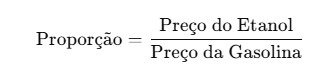

Isso ocorre porque o Etanol tem menor rendimento (em média faz 70% da quilometragem da gasolina).

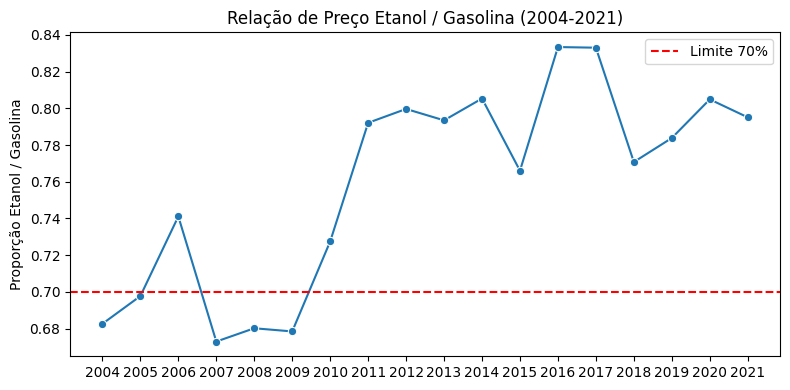

In [19]:
#Média anual dos preços de Revenda
precos_ano = df.groupby(['ANO', 'PRODUTO'])[['PREÇO MÉDIO REVENDA']].mean().reset_index()
precos_ano

precos_ano_sem_glp = precos_ano[precos_ano['PRODUTO'] != 'GLP'] #removendo GLP pois a unidade de medida é diferente

anos = sorted(df['ANO'].unique()) # criando variável para exibir todos os anos no eixo X

# Tabelas separadas
gasolina = precos_ano[precos_ano['PRODUTO'] == 'GASOLINA COMUM'].set_index('ANO')
etanol = precos_ano[precos_ano['PRODUTO'] == 'ETANOL HIDRATADO'].set_index('ANO')

# Calculando a razão
relacao = (etanol['PREÇO MÉDIO REVENDA'] / gasolina['PREÇO MÉDIO REVENDA']).reset_index()
relacao.columns = ['ANO', 'Proporcao_Etanol_Gasolina']

plt.figure(figsize=(8,4))
sns.lineplot(data=relacao, x='ANO', y='Proporcao_Etanol_Gasolina', marker='o')
plt.axhline(0.7, color='red', linestyle='--', label='Limite 70%')
plt.title('Relação de Preço Etanol / Gasolina (2004-2021)')
plt.ylabel('Proporção Etanol / Gasolina')
plt.xlabel('')
plt.legend()
plt.xticks(anos)
plt.tight_layout()
plt.savefig('../images/relacao_etanol_gasolina.png', dpi=300, bbox_inches='tight')
plt.show()


###  📊  Interpretação:

#### Quando a linha da proporção estiver abaixo de 0.7, o Etanol foi economicamente mais vantajoso naquele ano.

#### 📈 Acima de 0.7 → Gasolina mais vantajosa.


#### Ao longo dos anos, essa proporção ficou frequentemente acima de 70%, indicando que, na maior parte do tempo, a gasolina foi economicamente mais vantajosa.
#### Porém, a escolha do etanol em relação a gasolina foi economicamente mais vantajosa anos anos de 2004, 2005, 2007, 2008 e 2009.